In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

energia2022 = pd.read_csv('daasbstp2023/train/energia_202201-202212.csv', encoding='latin-1')    
energia2021 = pd.read_csv('daasbstp2023/train/energia_202109-202112.csv', encoding='latin-1')

energia2023_test = pd.read_csv('daasbstp2023/test/energia_202301-202304.csv', encoding='latin-1')

meteo2022 = pd.read_csv('daasbstp2023/train/meteo_202201-202212.csv', encoding='latin-1')
meteo2021 = pd.read_csv('daasbstp2023/train/meteo_202109-202112.csv', encoding='latin-1')

meteo2023_test = pd.read_csv('daasbstp2023/test/meteo_202301-202304.csv', encoding='latin-1')


# Converter datas
energia2021['Data'] = pd.to_datetime(energia2021['Data'], format='%Y-%m-%d')
energia2021['Hora'] = pd.to_datetime(energia2021['Hora'], format='%H')

energia2021['dt_converted'] = energia2021['Data'] + pd.to_timedelta(energia2021['Hora'].dt.hour, unit='h')

energia2021['dt_converted'] = pd.to_datetime(energia2021['dt_converted'], unit='s', utc=True)


energia2022['Data'] = pd.to_datetime(energia2022['Data'], format='%Y-%m-%d')
energia2022['Hora'] = pd.to_datetime(energia2022['Hora'], format='%H')

energia2022['dt_converted'] = energia2022['Data'] + pd.to_timedelta(energia2022['Hora'].dt.hour, unit='h')

energia2022['dt_converted'] = pd.to_datetime(energia2022['dt_converted'], unit='s', utc=True)


energia2023_test['Data'] = pd.to_datetime(energia2023_test['Data'], format='%Y-%m-%d')
energia2023_test['Hora'] = pd.to_datetime(energia2023_test['Hora'], format='%H')

energia2023_test['dt_converted'] = energia2023_test['Data'] + pd.to_timedelta(energia2023_test['Hora'].dt.hour, unit='h')

energia2023_test['dt_converted'] = pd.to_datetime(energia2023_test['dt_converted'], unit='s', utc=True)


meteo2021['dt_converted'] = pd.to_datetime(meteo2021['dt'], unit='s', utc=True)
meteo2022['dt_converted'] = pd.to_datetime(meteo2022['dt'], unit='s', utc=True)
meteo2023_test['dt_converted'] = pd.to_datetime(meteo2023_test['dt'], unit='s', utc=True)

# Merge datasets based on datetime
data21 = pd.merge(energia2021, meteo2021, on='dt_converted', how='inner')
data22 = pd.merge(energia2022, meteo2022, on='dt_converted', how='inner')

test = pd.merge(energia2023_test, meteo2023_test, on='dt_converted', how='outer')

# Drop columns
data21.drop('sea_level', axis=1, inplace=True)
data21.drop('grnd_level', axis=1, inplace=True)
data21.drop('rain_1h', axis=1, inplace=True)
data21.drop('Data', axis=1, inplace=True)
data21.drop('Hora', axis=1, inplace=True)
data21.drop('dt_iso', axis=1, inplace=True)
data21.drop('dt', axis=1, inplace=True)

data22.drop('sea_level', axis=1, inplace=True)
data22.drop('grnd_level', axis=1, inplace=True)
data22.drop('rain_1h', axis=1, inplace=True)
data22.drop('Data', axis=1, inplace=True)
data22.drop('Hora', axis=1, inplace=True)
data22.drop('dt_iso', axis=1, inplace=True)
data22.drop('dt', axis=1, inplace=True)

test.drop('sea_level', axis=1, inplace=True)
test.drop('grnd_level', axis=1, inplace=True)
test.drop('rain_1h', axis=1, inplace=True)
test.drop('Data', axis=1, inplace=True)
test.drop('Hora', axis=1, inplace=True)
test.drop('dt_iso', axis=1, inplace=True)
test.drop('dt', axis=1, inplace=True)

data21.drop('city_name', axis=1, inplace=True)
data22.drop('city_name', axis=1, inplace=True)
test.drop('city_name', axis=1, inplace=True)

train = pd.concat([data21, data22], axis=0)


# separar data em ano, mes e dia

train['ano'] = train['dt_converted'].apply(lambda x: x.year)
train['mes'] = train['dt_converted'].apply(lambda x: x.month)
train['dia'] = train['dt_converted'].apply(lambda x: x.day)
train['hora'] = train['dt_converted'].apply(lambda x: x.hour)

train['dia da semana'] = train['dt_converted'].apply(lambda x: x.weekday())

test['ano'] = test['dt_converted'].apply(lambda x: x.year)
test['mes'] = test['dt_converted'].apply(lambda x: x.month)
test['dia'] = test['dt_converted'].apply(lambda x: x.day)
test['hora'] = test['dt_converted'].apply(lambda x: x.hour)

test['dia da semana'] = test['dt_converted'].apply(lambda x: x.weekday())

train.drop('dt_converted', axis=1, inplace=True)
test.drop('dt_converted', axis=1, inplace=True)

lb_make = LabelEncoder()
train["weather_description"] = lb_make.fit_transform(train["weather_description"])
test["weather_description"] = lb_make.fit_transform(test["weather_description"])




train["weather_description"].unique()


train['Injeção na rede (kWh)'] = train['Injeção na rede (kWh)'].fillna('None')

dict_target = {"None": 0, "Low": 1, "Medium": 2, "High": 3, "Very High": 4}
train["Injeção na rede (kWh)"] = train["Injeção na rede (kWh)"].map(dict_target)

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,1752.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.599606,9.543265,9.177917,11.643813,1023.493721,75.639840,2.873613,44.489726,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.715156,4.191224,4.021176,3.596882,6.650873,17.415468,1.620450,42.972438,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.877500,6.217500,6.247500,8.900000,1020.000000,62.000000,1.800000,0.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.950000,10.135000,9.710000,11.820000,1024.000000,81.000000,2.490000,35.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,13.292500,12.742500,12.320000,14.040000,1029.000000,91.000000,3.500000,96.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


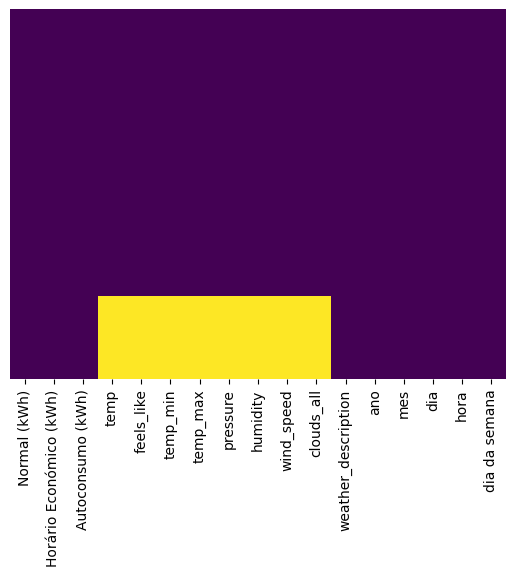

In [675]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.describe()

In [676]:
test["temp"] = test["temp"].interpolate(method='linear', axis=0)
test["temp_min"] = test["temp_min"].interpolate(method='linear', axis=0)
test["temp_max"] = test["temp_max"].interpolate(method='linear', axis=0)
test["pressure"] = test["pressure"].interpolate(method='linear',  axis=0)
test["humidity"] = test["humidity"].interpolate(method='linear',  axis=0)
test["wind_speed"] = test["wind_speed"].interpolate(method='linear',  axis=0)
test["clouds_all"] = test["clouds_all"].interpolate(method='linear',  axis=0)

print(test.isnull().sum())


Normal (kWh)                 0
Horário Económico (kWh)      0
Autoconsumo (kWh)            0
temp                         0
feels_like                 504
temp_min                     0
temp_max                     0
pressure                     0
humidity                     0
wind_speed                   0
clouds_all                   0
weather_description          0
ano                          0
mes                          0
dia                          0
hora                         0
dia da semana                0
dtype: int64


In [677]:
test.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
0,0.0,0.467,0.0,12.93,12.76,12.72,13.43,1019.0,95.0,2.02,100.0,4,2023,1,1,0,6
1,0.0,0.577,0.0,13.49,13.38,13.43,13.90,1018.0,95.0,2.18,100.0,4,2023,1,1,1,6
2,0.0,0.346,0.0,13.55,13.44,13.48,14.82,1017.0,95.0,2.88,100.0,4,2023,1,1,2,6
3,0.0,0.270,0.0,13.61,13.51,12.01,14.82,1016.0,95.0,3.63,100.0,4,2023,1,1,3,6
4,0.0,0.252,0.0,13.59,13.49,12.01,14.82,1015.0,95.0,4.58,100.0,4,2023,1,1,4,6


## Alternative to interpolate

In [678]:
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# # Lista das colunas que você deseja prever independentemente
# columns_to_predict = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all']

# #o dataset de treino nao pode ter valores nulos
# test2 = test.dropna(subset=columns_to_predict)

# #dropar colunas que nao serao usadas para prever "columns_to_predict"
# # test3 = test.drop(columns_to_predict, axis=1)
# # Iterar sobre as colunas e treinar modelos separados
# for column in columns_to_predict:
    
#     train_data = test2.dropna(subset=[column])
#     predict_data = test[test[column].isnull()]
    
#     for i in columns_to_predict:
#         if i != column:
#             train_data = train_data.drop(i, axis=1)
#         predict_data = predict_data.drop(i, axis=1)
        
    
#     X_train = train_data.drop(column, axis=1)
#     y_train = train_data[column]

#     # Treinar o modelo (usando regressão linear neste exemplo)
#     model = DecisionTreeRegressor()
#     model.fit(X_train, y_train)

#     # Fazer previsões para os valores ausentes
#     predictions = model.predict(predict_data)

#     # Adicionar as previsões ao DataFrame original
#     test.loc[test[column].isnull(), column] = predictions
    
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [679]:
test.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description,ano,mes,dia,hora,dia da semana
count,2256.000000,2256.000000,2256.000000,2256.000000,1752.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000
mean,0.268060,0.226809,0.119439,10.610864,9.543265,9.048808,11.672004,1023.160018,79.071365,2.497487,35.667553,5.620124,2023.0,2.085106,14.978723,11.500000,2.978723
std,0.464323,0.375752,0.190601,3.273828,4.191224,3.551593,3.169974,5.893633,16.627142,1.590902,41.286521,2.392843,0.0,0.907143,8.925982,6.923721,2.026759
min,0.000000,0.000000,0.000000,0.930000,-1.790000,-0.850000,3.340000,1006.000000,23.000000,0.120000,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.895000,6.217500,7.490000,10.010000,1021.000000,68.000000,1.190000,2.000000,4.000000,2023.0,1.000000,7.000000,5.750000,1.000000
50%,0.000000,0.000000,0.000000,10.650000,10.135000,8.600000,11.770000,1022.000000,87.000000,2.100000,5.000000,7.000000,2023.0,2.000000,15.000000,11.500000,3.000000
75%,0.398750,0.336000,0.237250,12.520000,12.742500,11.680000,13.720000,1028.000000,91.000000,3.100000,85.000000,7.000000,2023.0,3.000000,23.000000,17.250000,5.000000
max,3.381000,2.771000,1.161000,20.610000,19.790000,20.010000,22.010000,1036.000000,97.000000,10.320000,100.000000,8.000000,2023.0,4.000000,31.000000,23.000000,6.000000


## Outliers

In [680]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             2256 non-null   float64
 1   Horário Económico (kWh)  2256 non-null   float64
 2   Autoconsumo (kWh)        2256 non-null   float64
 3   temp                     2256 non-null   float64
 4   feels_like               1752 non-null   float64
 5   temp_min                 2256 non-null   float64
 6   temp_max                 2256 non-null   float64
 7   pressure                 2256 non-null   float64
 8   humidity                 2256 non-null   float64
 9   wind_speed               2256 non-null   float64
 10  clouds_all               2256 non-null   float64
 11  weather_description      2256 non-null   int32  
 12  ano                      2256 non-null   int64  
 13  mes                      2256 non-null   int64  
 14  dia                     

count    11016.000000
mean         0.202278
std          0.349478
min          0.000000
25%          0.000000
50%          0.000000
75%          0.314000
max          3.251000
Name: Normal (kWh), dtype: float64

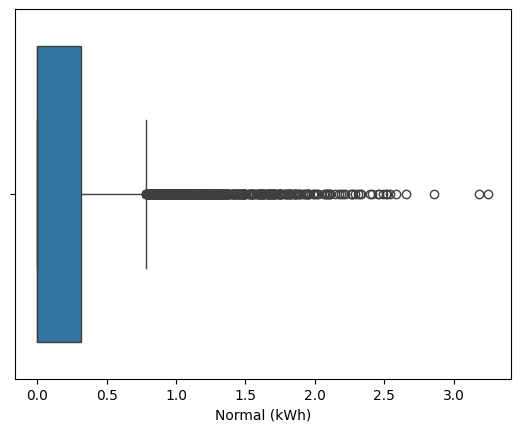

In [681]:
sns.boxplot(x=train["Normal (kWh)"])
train["Normal (kWh)"].describe()

In [682]:
# train.loc[train['Normal (kWh)'] > 3, 'Normal (kWh)'] = 3
# test.loc[train.bmi > 2.5, 'Normal (kWh)'] = np.nan
# test.fillna(2.5, inplace=True)

count    11016.000000
mean         0.159714
std          0.271792
min          0.000000
25%          0.000000
50%          0.000000
75%          0.288000
max          6.978000
Name: Horário Económico (kWh), dtype: float64

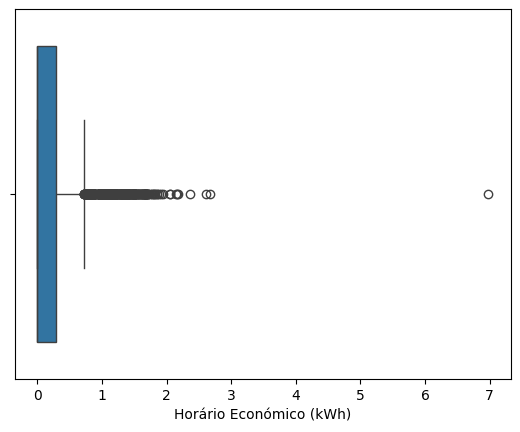

In [684]:
sns.boxplot(x=train["Horário Económico (kWh)"])
train["Horário Económico (kWh)"].describe()

In [685]:
# train.loc[train['Horário Económico (kWh)'] > 4, 'Horário Económico (kWh)'] = 4

count    11016.000000
mean         0.117314
std          0.176762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.227000
max          1.192000
Name: Autoconsumo (kWh), dtype: float64

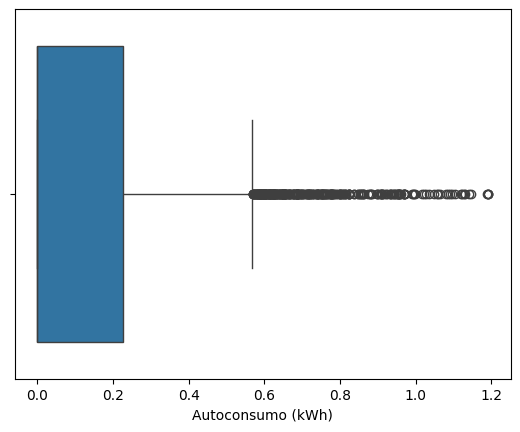

In [687]:
sns.boxplot(x=train["Autoconsumo (kWh)"])
train["Autoconsumo (kWh)"].describe()

In [688]:
# train.loc[train['Autoconsumo (kWh)'] > 1.1, 'Autoconsumo (kWh)'] = 1.1

count    11016.000000
mean        16.182991
std          5.756972
min          0.320000
25%         12.080000
50%         15.625000
75%         19.270000
max         40.850000
Name: temp, dtype: float64

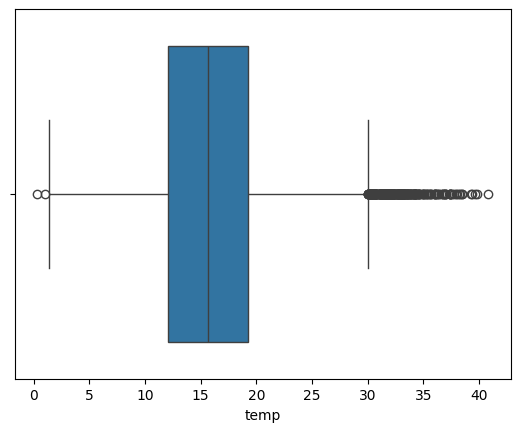

In [690]:
sns.boxplot(x=train["temp"])
train["temp"].describe()

count    11016.000000
mean        15.826868
std          6.264860
min         -2.190000
25%         11.507500
50%         15.230000
75%         19.260000
max         41.330000
Name: feels_like, dtype: float64

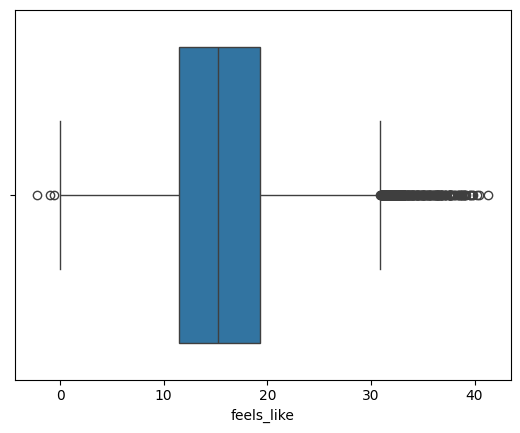

In [692]:
sns.boxplot(x=train["feels_like"])
train["feels_like"].describe()

count    11016.000000
mean        14.195064
std          4.956014
min         -0.640000
25%         10.720000
50%         14.230000
75%         17.490000
max         36.720000
Name: temp_min, dtype: float64

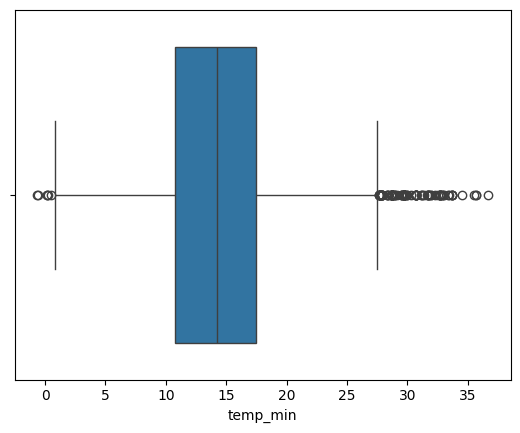

In [694]:
sns.boxplot(x=train["temp_min"])
train["temp_min"].describe()

count    11016.000000
mean        17.288098
std          6.164689
min          1.330000
25%         12.890000
50%         16.260000
75%         20.340000
max         41.450000
Name: temp_max, dtype: float64

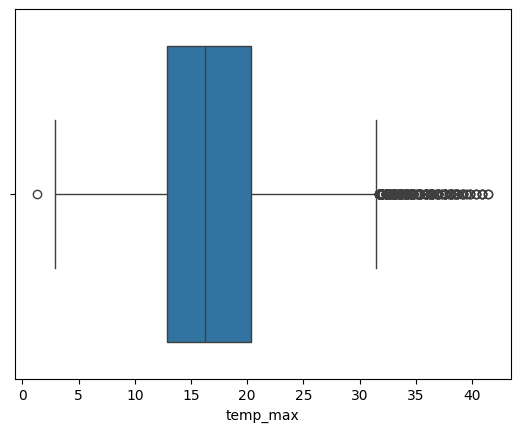

In [696]:
sns.boxplot(x=train["temp_max"])
train["temp_max"].describe()

count    11016.000000
mean      1018.396605
std          6.203379
min        994.000000
25%       1015.000000
50%       1018.000000
75%       1022.000000
max       1034.000000
Name: pressure, dtype: float64

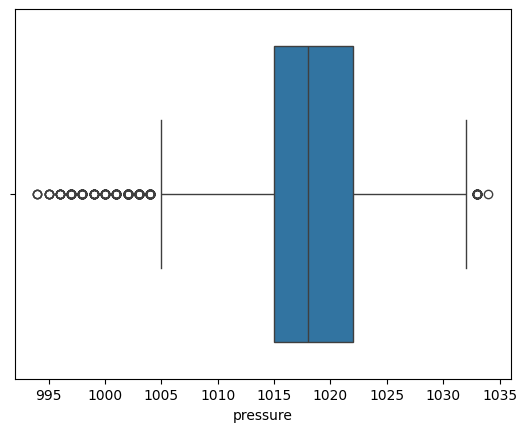

In [698]:
sns.boxplot(x=train["pressure"])
train["pressure"].describe()

count    11016.000000
mean        76.570715
std         16.268260
min         19.000000
25%         66.000000
50%         81.000000
75%         91.000000
max        100.000000
Name: humidity, dtype: float64

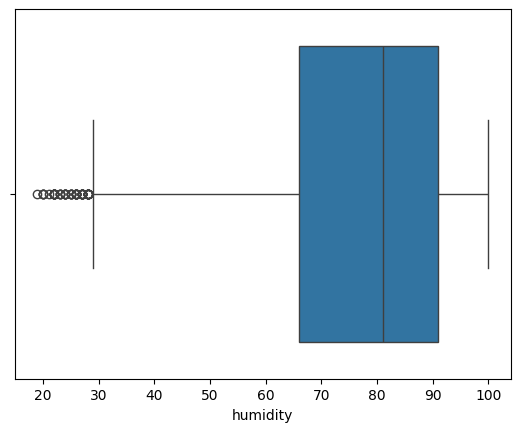

In [700]:
sns.boxplot(x=train["humidity"])
train["humidity"].describe()

count    11016.000000
mean         2.672039
std          1.476158
min          0.060000
25%          1.620000
50%          2.400000
75%          3.420000
max         11.100000
Name: wind_speed, dtype: float64

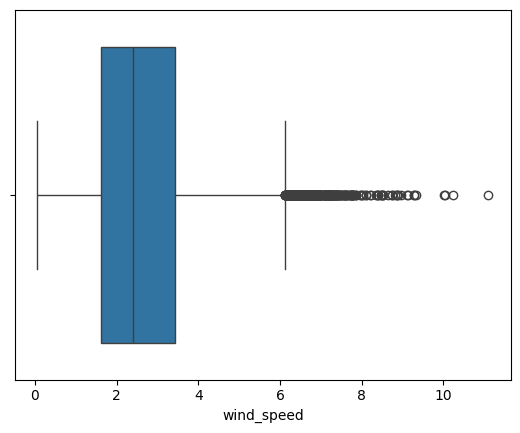

In [702]:
sns.boxplot(x=train["wind_speed"])
train["wind_speed"].describe()

count    11016.000000
mean        54.000908
std         40.553002
min          0.000000
25%          7.000000
50%         60.000000
75%         98.000000
max        100.000000
Name: clouds_all, dtype: float64

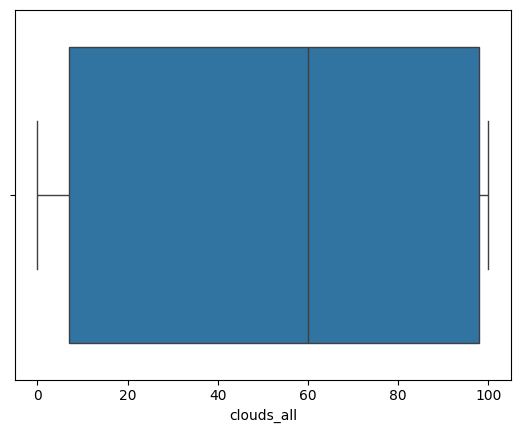

In [704]:
sns.boxplot(x=train["clouds_all"])
train["clouds_all"].describe()

# Drop de colunas 

In [706]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   pressure                 11016 non-null  int64  
 9   humidity                 11016 non-null  int64  
 10  wind_speed               11016 non-null  float64
 11  clouds_all               11016 non-null  int64  
 12  weather_description      11016 non-null  int32  
 13  ano                      11016 non-null  int64  
 14  mes                      110

In [707]:
# train['Injeção na rede (kWh)'] =train['Injeção na rede (kWh)'].astype('float64')

# test['weather_description']=test['weather_description'].astype('int64')
# train['weather_description']=train['weather_description'].astype('int64')

#-----------------------

test.drop('feels_like', axis=1, inplace=True)
train.drop('feels_like', axis=1, inplace=True)


train.drop('dia', axis=1, inplace=True)
test.drop('dia', axis=1, inplace=True)


train.drop('wind_speed', axis=1, inplace=True)
test.drop('wind_speed', axis=1, inplace=True)


In [708]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   pressure                 11016 non-null  int64  
 8   humidity                 11016 non-null  int64  
 9   clouds_all               11016 non-null  int64  
 10  weather_description      11016 non-null  int32  
 11  ano                      11016 non-null  int64  
 12  mes                      11016 non-null  int64  
 13  hora                     11016 non-null  int64  
 14  dia da semana            110

# Correlação

<Axes: >

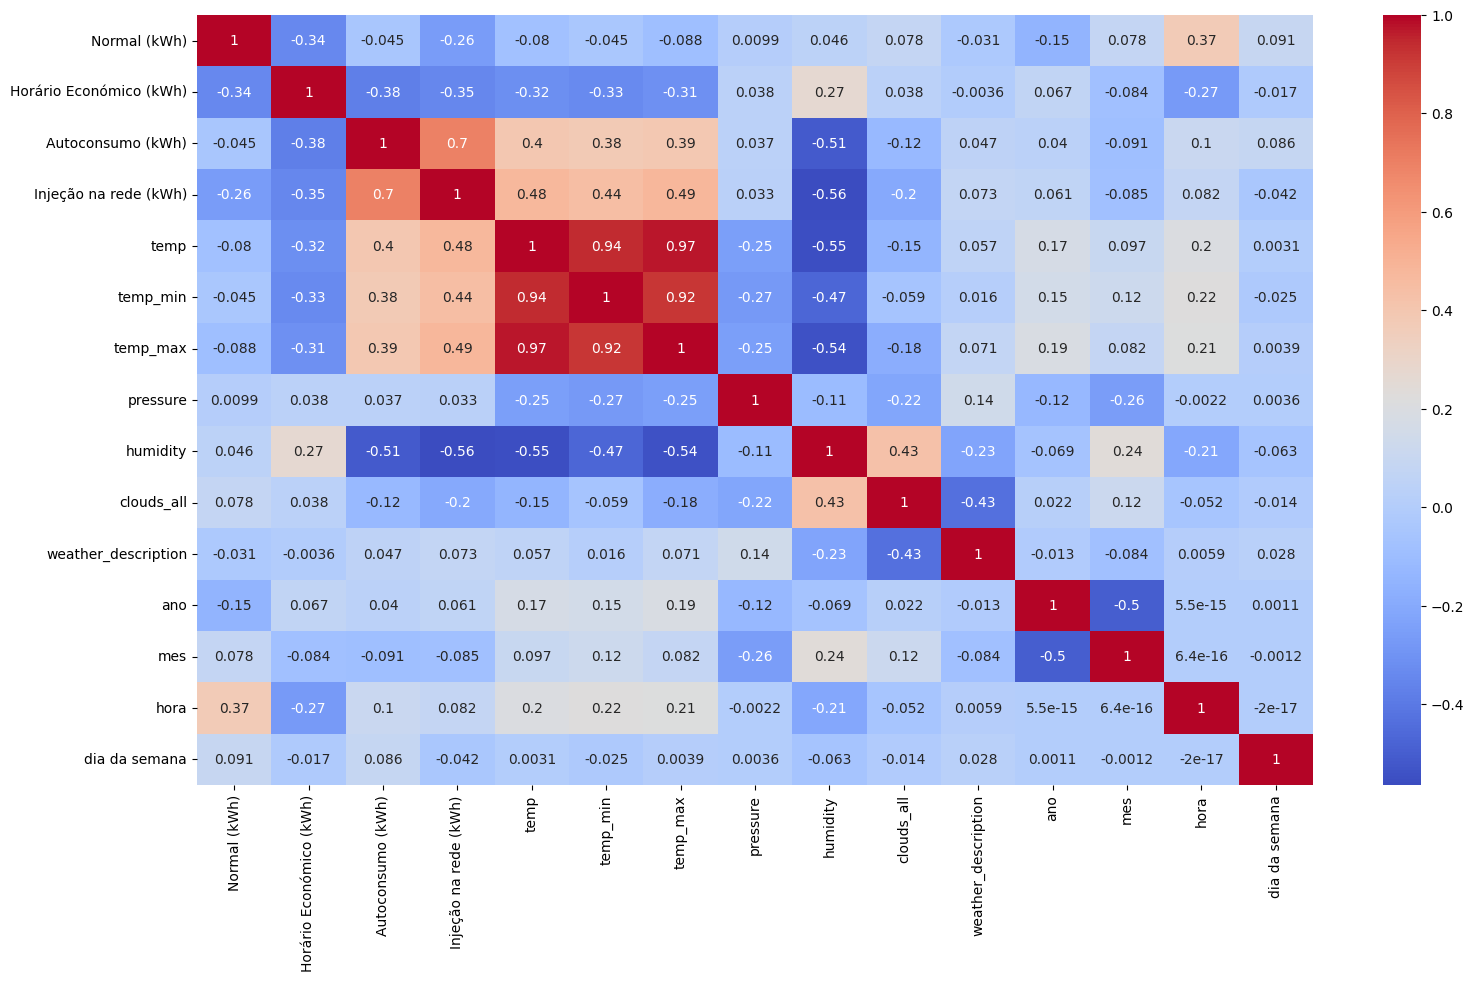

In [709]:
plt.subplots(figsize=(18,10))
train_corr = train.corr(method='pearson')
sns.heatmap(train_corr, annot = True, cmap='coolwarm')

In [710]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [711]:
train_feat = train.drop(['Injeção na rede (kWh)'], axis = 1)
train_target = train[['Injeção na rede (kWh)']]

x_train = train_feat
y_train= np.ravel(train_target) 

## Oversampling

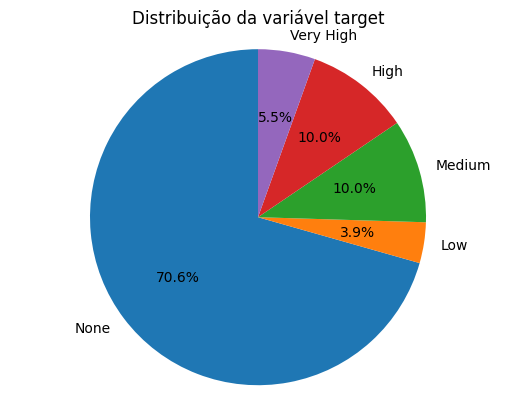

In [712]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Suponha que X e y são seus recursos e rótulos, respectivamente
# X, y = ...

# Contar o número de instâncias na classe 1 ("low")
count_class_1 = sum(y_train == 1)

# Criar uma instância do RandomOverSampler com a proporção desejada
oversampler = RandomOverSampler(sampling_strategy={1: int(count_class_1 * 1.5)}, random_state=42)

# Aplicar oversampling apenas na classe 1 do conjunto de treino
x_train, y_train = oversampler.fit_resample(x_train, y_train)



labels = 'None', 'Low', 'Medium', 'High', 'Very High'
sizes = [train['Injeção na rede (kWh)'].value_counts()[0], train['Injeção na rede (kWh)'].value_counts()[1], train['Injeção na rede (kWh)'].value_counts()[2], train['Injeção na rede (kWh)'].value_counts()[3], train['Injeção na rede (kWh)'].value_counts()[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Distribuição da variável target')
ax1.axis('equal')

plt.show()


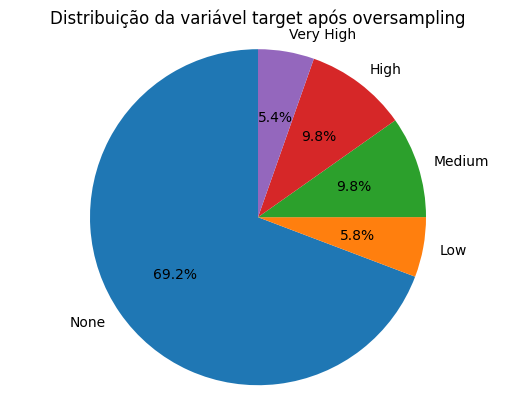

In [713]:
labels = 'None', 'Low', 'Medium', 'High', 'Very High'
unique_values, counts = np.unique(y_train, return_counts=True)

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Distribuição da variável target após oversampling')
ax1.axis('equal')

plt.show()

# Normalização

In [714]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(train_feat)
scaler_Y = MinMaxScaler(feature_range=(0, 1)).fit(train_target)
feat_scaled = pd.DataFrame(scaler_X.transform(train_feat[train_feat.columns]), columns=train_feat.columns)
target_scaled = pd.DataFrame(scaler_Y.transform(train_target[train_target.columns]), columns=train_target.columns)

In [715]:
feat_scaled.describe()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,temp_min,temp_max,pressure,humidity,clouds_all,weather_description,ano,mes,hora,dia da semana
count,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,0.062220,0.022888,0.098418,0.391389,0.397084,0.397759,0.609915,0.710750,0.540009,0.624974,0.795207,0.584868,0.500000,0.500726
std,0.107499,0.038950,0.148290,0.142042,0.132656,0.153656,0.155084,0.200843,0.405530,0.343416,0.403569,0.325303,0.300978,0.332439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.290155,0.304069,0.288136,0.525000,0.580247,0.070000,0.428571,1.000000,0.272727,0.250000,0.166667
50%,0.000000,0.000000,0.000000,0.377622,0.398019,0.372134,0.600000,0.765432,0.600000,0.714286,1.000000,0.636364,0.500000,0.500000
75%,0.096586,0.041273,0.190436,0.467555,0.485278,0.473829,0.700000,0.888889,0.980000,1.000000,1.000000,0.909091,0.750000,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# split train 

In [716]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, train_target, test_size=0.2, random_state=1000)
x_train3, x_test3, y_train3, y_test3 = train_test_split(train_feat, train_target, test_size=0.2, random_state=1000)

## SVM

In [717]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=1000),param_grid,refit=True,verbose=3)

In [718]:
# scores = cross_val_score(grid, feat_scaled, train_target, cv=10)

In [719]:
# print("Result for SVM: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [720]:
# grid.fit(x_train2, y_train2)

In [721]:
# predictions = grid.predict(x_test2)

# predictions

In [722]:
from sklearn.metrics import precision_score
# precision = precision_score(y_test2, predictions, average='micro')

# print(f'Precision: {precision}')

# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, predictions)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
# disp.plot()

## AdaBoostClassifier

In [723]:
from sklearn.ensemble import AdaBoostClassifier

base_model = AdaBoostClassifier()

# hiperparâmetros para o Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250,500],
    'learning_rate': [0.01, 0.02, 0.1],
}
# grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='accuracy', cv=5)
# scores = cross_val_score(grid_search, feat_scaled, train_target, cv=10)
# print("Result for SVM: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

# grid_search.fit(x_train2, y_train2)

In [724]:
# print("Best Parameters: ", grid_search.best_params_)

In [725]:
# best_model = grid_search.best_estimator_
# predictions = best_model.predict(x_test2)
# accuracy = accuracy_score(y_test2, predictions)
# print("Accuracy on Test Set: %0.4f" % accuracy)

In [726]:
base_estimator = DecisionTreeClassifier(max_depth=5) 
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=400, learning_rate=0.1, random_state=42)
# scores = cross_val_score(ada, feat_scaled, train_target, cv=5)
# print("Result for SVM: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

ada.fit(x_train2, y_train2)

predictions = ada.predict(x_test2)

C:\Users\edini22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\edini22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precision: 0.8411978221415608
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1565
           1       0.23      0.24      0.23        79
           2       0.51      0.61      0.55       226
           3       0.62      0.78      0.69       227
           4       0.78      0.64      0.71       107

    accuracy                           0.84      2204
   macro avg       0.62      0.64      0.63      2204
weighted avg       0.86      0.84      0.85      2204



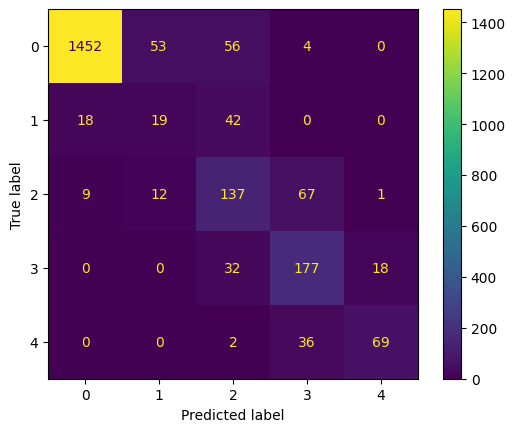

In [727]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score
precision = precision_score(y_test2, predictions, average='micro')
print(f'Precision: {precision}')
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()
print(classification_report(y_test2, predictions))

## Random Forest

In [728]:
modelRandomForest = RandomForestClassifier(n_estimators = 500, max_depth=15,random_state=1000)
# scores = cross_val_score(modelRandomForest, x_train, y_train, cv=10)
# print("Result for Random Forest: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [729]:
modelRandomForest.fit(x_train, y_train)
predictions = modelRandomForest.predict(test)

# dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
# sto_numeric = [dict_target[result] for result in predictions]

# result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
# result_df.to_csv("dummy_submission.csv", index=False)

Precision: 0.8784029038112523
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1565
           1       0.54      0.24      0.33        79
           2       0.62      0.66      0.64       226
           3       0.66      0.74      0.70       227
           4       0.74      0.65      0.70       107

    accuracy                           0.88      2204
   macro avg       0.71      0.66      0.67      2204
weighted avg       0.88      0.88      0.87      2204



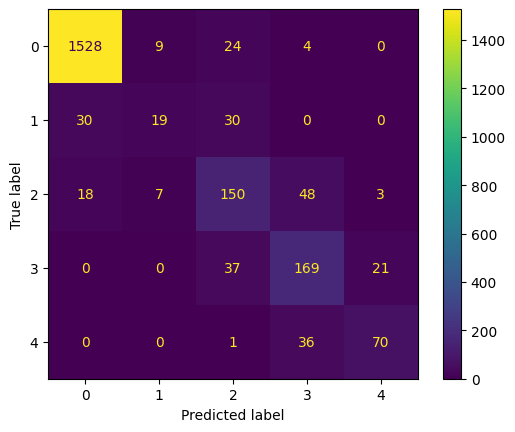

In [730]:
modelRandomForest.fit(x_train2, np.ravel(y_train2))
predictions = modelRandomForest.predict(x_test2)

predictions

from sklearn.metrics import precision_score
precision = precision_score(y_test2, predictions, average='micro')

print(f'Precision: {precision}')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()
print(classification_report(y_test2, predictions))

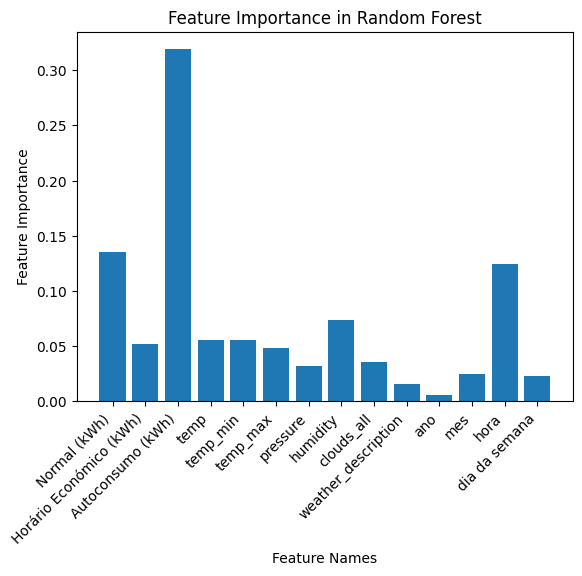

In [731]:
from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target

model = RandomForestClassifier(n_estimators = 500, max_depth=15,random_state=1000)

# Treinando o modelo
model.fit(x_train2, np.ravel(y_train2))

feature_importance = model.feature_importances_

# Obtendo os nomes das características
feature_names = x_train2.columns.tolist()

# Criando um gráfico de barras para visualizar a importância das características
plt.bar(feature_names, feature_importance)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos
plt.show()

### XGBClassifier

In [732]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.01, 0.02, 0.1],
    'max_depth': [4, 5, 6]
}

In [733]:
from xgboost import XGBClassifier

# xgboost = XGBClassifier(random_state=1000)
# grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(feat_scaled, np.ravel(train_target))
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [734]:
# Obtenha os melhores parâmetros e a pontuação correspondente
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)

In [735]:
# xgboost = XGBClassifier(n_estimators=500,max_depth=5,learning_rate=0.01 ,random_state=1000) #0.86686
xgboost = XGBClassifier(scale_pos_weight=3, min_child_weight=5,n_estimators=500,learning_rate=0.01, max_depth = 5 ,random_state=1000, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=10, verbosity=0, subsample=0.9)

# scores = cross_val_score(xgboost, x_train, y_train, cv=10)
# print("Result for XGBoost: %0.4f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [736]:
xgboost.fit(x_train,y_train)
predictions = xgboost.predict(test)

dict_target = {0 : "None", 1: "Low", 2: "Medium", 3: "High", 4:"Very_High"}
sto_numeric = [dict_target[result] for result in predictions]

result_df = pd.DataFrame({'RowId': range(1, len(predictions)+1), 'Result': sto_numeric})
# result_df.to_csv("dummy_submission.csv", index=False)

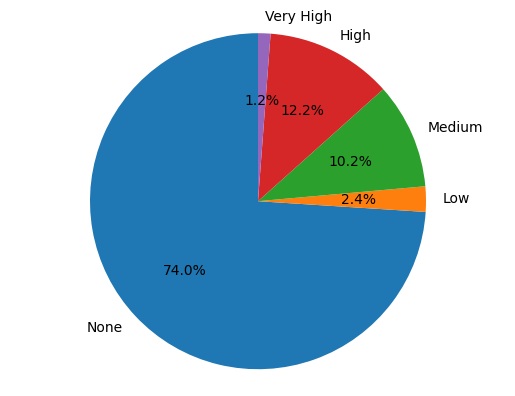

In [737]:
## grafico circular com a percentagem de cada categoria do target
labels = 'None', 'Low', 'Medium', 'High', 'Very High'
# convert numpy array to dataframe
p = pd.DataFrame(predictions)

sizes = [p.value_counts()[0], p.value_counts()[1], p.value_counts()[2], p.value_counts()[3], p.value_counts()[4]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

Precision: 0.8856624319419237
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1565
           1       0.46      0.28      0.35        79
           2       0.66      0.64      0.65       226
           3       0.69      0.76      0.72       227
           4       0.72      0.76      0.74       107

    accuracy                           0.89      2204
   macro avg       0.70      0.68      0.69      2204
weighted avg       0.88      0.89      0.88      2204



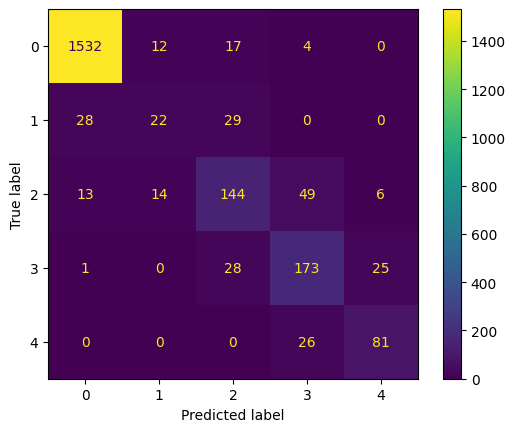

In [738]:
xgboost.fit(x_train2, y_train2)
predictions = xgboost.predict(x_test2)

predictions

from sklearn.metrics import precision_score
precision = precision_score(y_test2, predictions, average='micro')

print(f'Precision: {precision}')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4])
disp.plot()
print(classification_report(y_test2, predictions))

## Redes Neuronais

In [739]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(feat_scaled, target_scaled, test_size=0.2, random_state=1000)

In [740]:
#tanh
def build_model(activation = 'tanh', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(32, input_dim = 14, activation = activation))
    model.add(Dense(16, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = activation))
    
    model.compile(loss = 'mae', 
            optimizer = tf.optimizers.Adam(learning_rate), 
            metrics = ['mae','mse'])
    return model

In [741]:
model = build_model()
model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_208 (Dense)           (None, 32)                480       
                                                                 
 dense_209 (Dense)           (None, 16)                528       
                                                                 
 dense_210 (Dense)           (None, 8)                 136       
                                                                 
 dense_211 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [742]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [743]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [744]:
model = KerasRegressor(model = build_model, batch_size = 32,validation_split = 0.2, epochs = 25)

In [745]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [746]:
grid_search.fit(x_train2, y_train2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/25


177/177 [==============================] - 1s 2ms/step - loss: 0.1481 - mae: 0.1481 - mse: 0.0574 - val_loss: 0.1215 - val_mae: 0.1215 - val_mse: 0.0258
Epoch 2/25
177/177 [==============================] - 0s 1ms/step - loss: 0.0825 - mae: 0.0825 - mse: 0.0223 - val_loss: 0.0721 - val_mae: 0.0721 - val_mse: 0.0170
Epoch 3/25
177/177 [==============================] - 0s 1ms/step - loss: 0.0735 - mae: 0.0735 - mse: 0.0206 - val_loss: 0.0739 - val_mae: 0.0739 - val_mse: 0.0182
Epoch 4/25
177/177 [==============================] - 0s 1ms/step - loss: 0.0679 - mae: 0.0679 - mse: 0.0184 - val_loss: 0.0614 - val_mae: 0.0614 - val_mse: 0.0175
Epoch 5/25
177/177 [==============================] - 0s 1ms/step - loss: 0.0648 - mae: 0.0648 - mse: 0.0173 - val_loss: 0.0863 - val_mae: 0.0863 - val_mse: 0.0343
Epoch 6/25
177/177 [==============================] - 0s 1ms/step - loss: 0.0672 - mae: 0.0672 - mse: 0.0185 - val_loss: 0.0591 - val_mae: 0.0591 - val_mse: 0.0153
Epoch 7/25
177/177 [=======

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=25, model=<function build_model at 0x000001860B88F600>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [747]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.057852 using {'optimizer': 'Adagrad'}


In [748]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [749]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.059061 (0.000880) with: {'optimizer': 'SGD'}
-0.059652 (0.003544) with: {'optimizer': 'RMSprop'}
-0.057852 (0.003276) with: {'optimizer': 'Adagrad'}


In [750]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000001860B88F600>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=25
)


In [751]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.057852 using {'optimizer': 'Adagrad'}


In [752]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [753]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.059061 (0.000880) with: {'optimizer': 'SGD'}
-0.059652 (0.003544) with: {'optimizer': 'RMSprop'}
-0.057852 (0.003276) with: {'optimizer': 'Adagrad'}


In [754]:
best_mlp_model_2 = grid_search.best_estimator_
print(best_mlp_model_2)

KerasRegressor(
	model=<function build_model at 0x000001860B88F600>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=25
)


In [755]:
best_mlp_model_2.fit(x_train2,y_train2,epochs = 25, validation_data = (x_train2,y_train2), verbose = 1)

Epoch 1/25


276/276 [==============================] - 2s 3ms/step - loss: 0.1050 - mae: 0.1050 - mse: 0.0358 - val_loss: 0.0708 - val_mae: 0.0708 - val_mse: 0.0188
Epoch 2/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0665 - mae: 0.0665 - mse: 0.0182 - val_loss: 0.0642 - val_mae: 0.0642 - val_mse: 0.0166
Epoch 3/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0663 - mae: 0.0663 - mse: 0.0181 - val_loss: 0.0648 - val_mae: 0.0648 - val_mse: 0.0188
Epoch 4/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0625 - mae: 0.0625 - mse: 0.0170 - val_loss: 0.0579 - val_mae: 0.0579 - val_mse: 0.0149
Epoch 5/25
276/276 [==============================] - 1s 2ms/step - loss: 0.0607 - mae: 0.0607 - mse: 0.0161 - val_loss: 0.0681 - val_mae: 0.0681 - val_mse: 0.0159
Epoch 6/25
276/276 [==============================] - 1s 3ms/step - loss: 0.0596 - mae: 0.0596 - mse: 0.0154 - val_loss: 0.0586 - val_mae: 0.0586 - val_mse: 0.0156
Epoch 7/25
276/276 [=======

KerasRegressor(
	model=<function build_model at 0x000001860B88F600>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=25
)

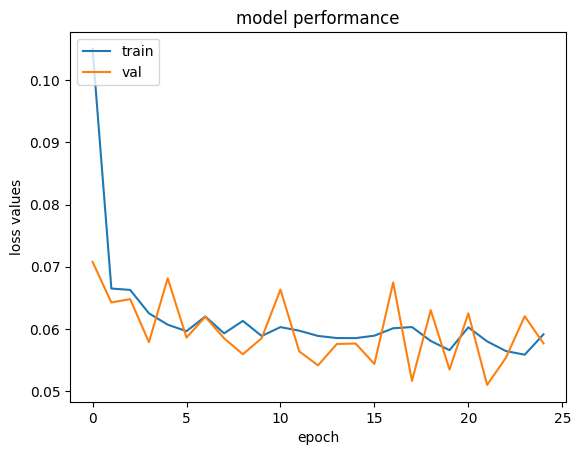

In [756]:
plt.plot(best_mlp_model_2.history_['loss'])
plt.plot(best_mlp_model_2.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

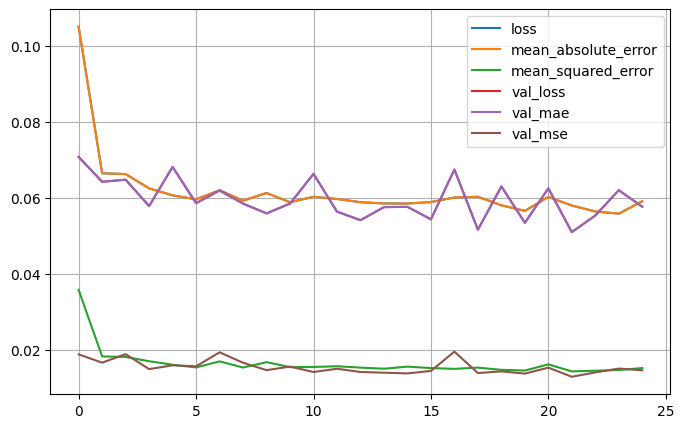

In [757]:
pd.DataFrame(best_mlp_model_2.history_).plot(figsize=(8, 5))
plt.grid(True)


### Predictions

In [758]:
predictions = best_mlp_model_2.predict(x_test2)

69/69 [==============================] - 0s 841us/step


In [759]:
# predictions
#unscale
predictions = scaler_Y.inverse_transform(predictions)
predictions[predictions < 0] = 0
predictions[predictions > 4] = 4
#round
predictions = np.round(predictions)
p = pd.DataFrame(predictions)
p.nunique()

#list of different values
p2 = np.unique(p)
p2

array([0., 1., 2., 3.], dtype=float32)

In [760]:

y_test2 = scaler_Y.inverse_transform(y_test2)
p3 = np.unique(y_test2)
p3

array([0., 1., 2., 3., 4.])

In [761]:
from sklearn.metrics import precision_score
precision = precision_score(y_test2, p, average='micro')

print(f'Precision: {precision}')


Precision: 0.8248638838475499


In [762]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test2, predictions))
print('MSE:', metrics.mean_squared_error(y_test2, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions)))

MAE: 0.20326678765880218
MSE: 0.26225045372050815
RMSE: 0.5121039481594613
